## Importing dataset and preprocessing


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2025-11-18 18:44:20--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.207, 172.217.203.207, 173.194.215.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  32.3MB/s    in 0.2s    

2025-11-18 18:44:20 (32.3 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
data = pd.read_json("./sarcasm.json")
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['is_sarcastic'], test_size=0.2)

In [23]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"
pad_type ='post'

In [24]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)


## Model


In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
num_epochs = 20

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))


Epoch 1/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6448 - loss: 0.6088 - val_accuracy: 0.8459 - val_loss: 0.4290
Epoch 2/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9043 - loss: 0.2936 - val_accuracy: 0.8652 - val_loss: 0.3002
Epoch 3/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9515 - loss: 0.1428 - val_accuracy: 0.8641 - val_loss: 0.3268
Epoch 4/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9784 - loss: 0.0756 - val_accuracy: 0.8568 - val_loss: 0.3798
Epoch 5/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9913 - loss: 0.0403 - val_accuracy: 0.8553 - val_loss: 0.4349
Epoch 6/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9971 - loss: 0.0176 - val_accuracy: 0.8484 - val_loss: 0.5022
Epoch 7/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9983 - loss: 0.0111 - val_accuracy: 0.8501 - val_loss: 0.5463
Epoch 8/20
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9996 - loss: 0.0046 - val_accuracy: 0.

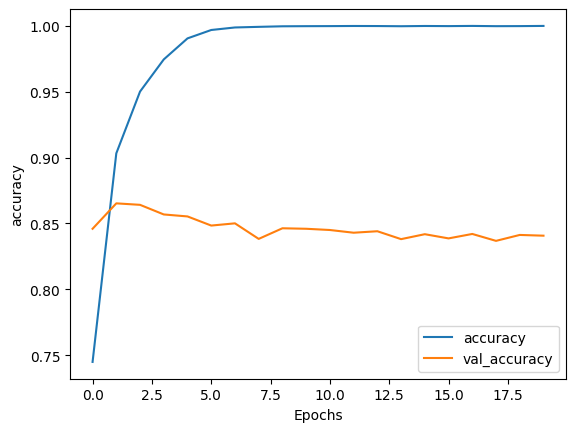

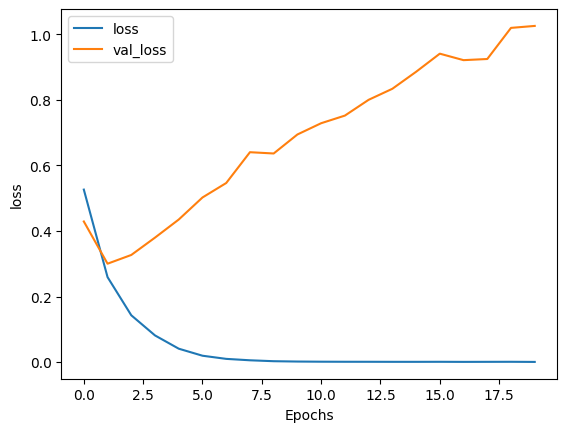

In [28]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")